**базовые модели ML**

Евгений Борисов <esborisov@sevsu.ru>

----

In [1]:
# # показывать выдачу всех строк ячейки
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# import gzip
# import pickle

import numpy as np
import numpy.random as rng
# import pandas as pd
# import gc
from tqdm import tqdm

# from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [3]:
# tqdm.pandas ()
# pd.options.display.float_format = '{:,.2f}'.format

---

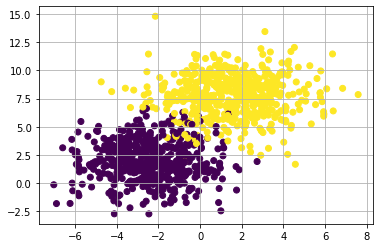

In [39]:
from sklearn.datasets import make_blobs

# X,y = make_blobs( n_samples=1000, centers=3, cluster_std=[1.0, 0.9, 0.8] )
X,y = make_blobs( n_samples=1000, centers=2, cluster_std=[1.7,1.8] )
X.shape,y.shape

plt.scatter(X[:,0],X[:,1],c=y)
plt.grid()

## FactorLRA

In [40]:
from lib.optimizer.lrate import ConstLRA
lr =  ConstLRA(.1)
[ lr.next() for _ in range(100) ]
lr.history

[0.1]

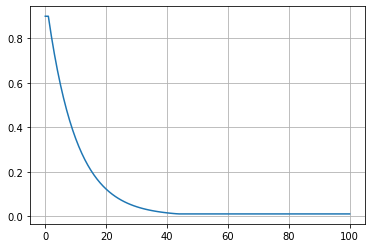

In [41]:
from lib.optimizer.lrate import FactorLRA
lr =  FactorLRA(value=.9,bound=.01,factor=.9,)
v = [ lr.next() for _ in range(100)] 
plt.plot(lr.history)
plt.grid()

## LogisticRegression + BCE + SGD

In [42]:
from lib.estimator import  ClassifierEstimator

100%|██████████| 10/10 [00:00<00:00, 837.60it/s, loss=0.21, lr=0.1]

Threshold value is:0.8085803773422928

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       500
           1       0.95      0.91      0.93       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



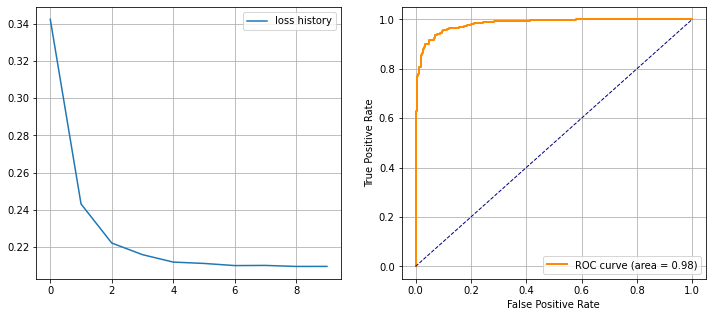

In [43]:
from lib.model.linear import LogisticRegression
from lib.loss.crossentropy import BCE
from lib.optimizer.gd import SGD

y_ = y[:,np.newaxis]

model = LogisticRegression(n_features=X.shape[1] )
lra=ConstLRA(.1)
lsh,lrh = SGD(BCE(model),lra=lra).fit([X,y_],n_epoch=10,batch_size=X.shape[0]//3)
p = model.predict(X)

ClassifierEstimator( target=y, predict_score=p, loss_history=lsh, ).estimate()

## LinearModel  + MSQE + GD

100%|██████████| 15/15 [00:00<00:00, 1587.03it/s, loss=0.325, lr=0.01]

(1000, 2)
Threshold value is:0.524197815485257

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       500
           1       0.98      0.96      0.97       500

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



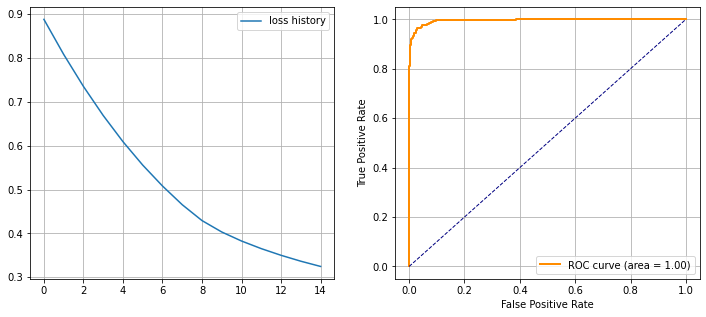

In [44]:
from lib.model.linear import LinearModel
from lib.optimizer.gd import GD
from lib.loss.msqe import MSQE

%xdel model 

y_ = np.eye(y.max()+1)[y]
print(y_.shape)

model = LinearModel(n_features=X.shape[1],n_out=y_.shape[1] )

lsh,lrh = GD(MSQE(model),lra=ConstLRA(.01)).fit([X,y_],n_epoch=15)
p = model.predict(X)[:,1]

ClassifierEstimator( target=y, predict_score=p,  loss_history=lsh, ).estimate()

## LinearModel  + CCE + GD

In [45]:
from lib.optimizer.gd import EarlyStopping
# EarlyStopping(min_delta,patience)

 30%|███       | 3/10 [00:00<00:00, 932.34it/s, loss=-3, lr=0.001]

(1000, 2)
Threshold value is:0.028491257003974587

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       500
           1       0.96      0.96      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



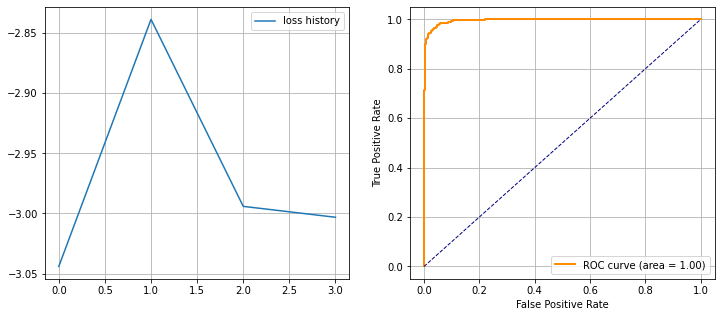

In [46]:
from lib.model.linear import LinearModel
from lib.optimizer.gd import GD
from lib.loss.crossentropy import CCE

del model 

y_ = np.eye(y.max()+1)[y]
print(y_.shape)

model = LinearModel(n_features=X.shape[1],n_out=y_.shape[1] )

lra=ConstLRA(.001)
es=EarlyStopping(min_delta=1e-3,patience=3)
lsh,lrh = GD(CCE(model),lra=lra,es=es).fit([X,y_],n_epoch=10)
p = model.predict(X)[:,1]

ClassifierEstimator( target=y, predict_score=p,  loss_history=lsh, ).estimate()

## LinearModel  + CCE + SGD

 80%|████████  | 8/10 [00:00<00:00, 1047.92it/s, loss=-3.63, lr=0.001]

(1000, 2)
Threshold value is:0.05567674737140834

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       500
           1       0.97      0.94      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



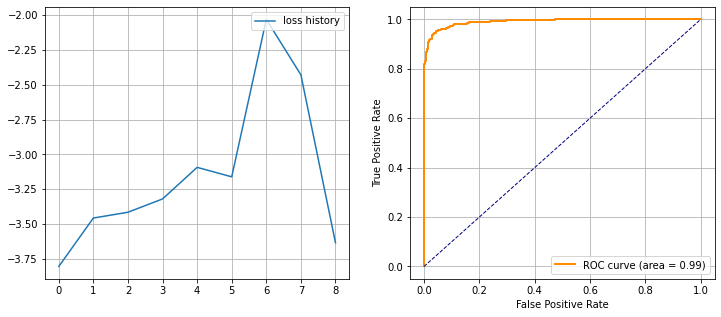

In [48]:
from lib.model.linear import LinearModel
from lib.optimizer.gd import SGD
from lib.loss.crossentropy import CCE

del model 

y_ = np.eye(y.max()+1)[y]
print(y_.shape)

model = LinearModel(n_features=X.shape[1],n_out=y_.shape[1] )

lra=ConstLRA(.001)
es=EarlyStopping(min_delta=1e-3,patience=3)
lsh,lrh = SGD(CCE(model),lra=lra,es=es).fit([X,y_],n_epoch=10,batch_size=X.shape[0]//2)
p = model.predict(X)[:,0]

ClassifierEstimator( target=y, predict_score=p,  loss_history=lsh, ).estimate()

## Softmax  + CCE + SGD

100%|██████████| 10/10 [00:00<00:00, 858.13it/s, loss=-6.48, lr=0.1]

(1000, 2)
Threshold value is:0.9994876026263588

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       500
           1       0.97      0.95      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



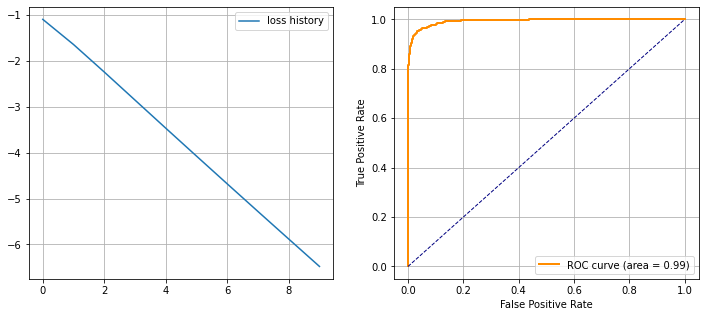

In [49]:
from lib.model.linear import Softmax
from lib.optimizer.gd import SGD
from lib.loss.crossentropy import CCE

%xdel model 

y_ = np.eye(y.max()+1)[y]
print(y_.shape)

model = Softmax(n_features=X.shape[1],n_out=y_.shape[1] )

lsh,lrh = SGD(CCE(model),lra=ConstLRA(.1)).fit([X,y_],n_epoch=10,batch_size=X.shape[0]//2)
p = model.predict(X)[:,0]

ClassifierEstimator( target=y, predict_score=p,  loss_history=lsh, ).estimate()

## LinearRegression + MSQE + GD

In [63]:
# from sklearn.datasets import fetch_california_housing
# from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

Xr,yr = make_regression(n_samples=100,n_features=1,noise=9.1, shuffle=True,)
# plt.scatter(x,y)
# plt.grid()

In [64]:
from lib.model.linear import LinearRegression
from lib.loss.msqe import MSQE
from lib.optimizer.gd import SGD

%xdel model 

y_ = yr[:,np.newaxis]

model = LinearRegression(n_features=Xr.shape[1] )

es=EarlyStopping(min_delta=1e-2,patience=4)
lra=ConstLRA(.9)
lsh,lrh = SGD(MSQE(model),lra=lra,es=es).fit([Xr,y_],n_epoch=15,batch_size=10)

 20%|██        | 3/15 [00:00<00:00, 731.27it/s, loss=129, lr=0.9]


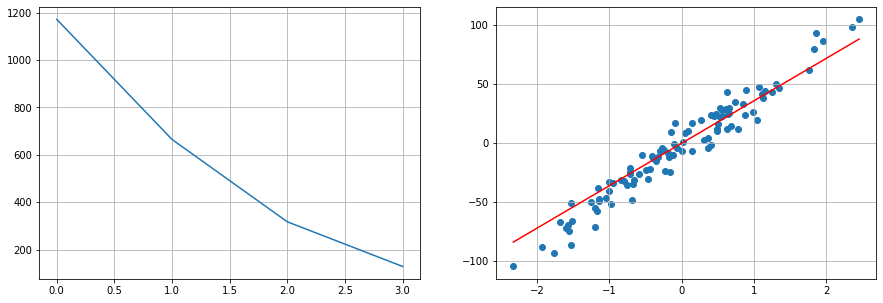

In [65]:
a = np.linspace(Xr.min(),Xr.max(),100)[:,np.newaxis]
p = model.predict(a)

fig,(ax0,ax1) = plt.subplots(1,2,figsize=(15,5))
ax0.plot(lsh)
ax0.grid()

ax1.scatter(Xr,yr)
ax1.plot(a,p,c='r')
ax1.grid()
